In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LassoCV, LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report, 
ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, PredictionErrorDisplay)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.utils.discovery import all_displays
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import LearningCurveDisplay, learning_curve

from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from scipy.stats import fisher_exact

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier.threshold import discrimination_threshold

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import json

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/michael/Documents/MA Stats/STAT 8090/final dataset/full dataset.csv')

data.head()

,Symbol,Company_Name,Exchange,Orig_Range_Low,Orig_Range_High,Price,Shares,Offer_Amount,ipo_date,is_Friday,...,plustwo_volume_pct,plusthree_change_pct,plusthree_volume_pct,plus90_change_pct,plus90_volume_pct,plus180_change_pct,plus180_volume_pct,d1_d180,d1_pop,d1_d180_pre_price
0,CRGX,Cargo Therapeutics,Nasdaq,15.0,17.0,15.0,18750000,281250000,11/10/23,1,...,0.015489,0.015478,0.008329,0.004261,0.000001,0.028773,1.600000e-09,1,0,1
1,HG,Hamilton Insurance,NYSE,16.0,18.0,15.0,15000000,225000000,11/10/23,1,...,0.050263,-0.010451,0.004091,0.024725,0.000001,0.032742,1.133330e-09,1,0,1
2,LXEO,Lexeo Therapeutics,Nasdaq,13.0,15.0,11.0,9090910,100000010,11/3/23,1,...,0.013554,-0.005607,0.027481,-0.007088,0.008493,-0.010459,8.693079e-03,1,0,1
3,MNR,Mach Resources,NYSE,19.0,21.0,19.0,10000000,190000000,10/25/23,0,...,0.014016,-0.060652,0.014147,0.015936,0.004482,-0.021266,7.778900e-03,1,0,1
4,BIRK,Birkenstock,NYSE,44.0,49.0,46.0,32258064,1483870944,10/11/23,0,...,0.000001,0.037633,0.094204,-0.012492,0.017129,-0.002016,1.296451e-02,1,0,0


In [3]:
validation = pd.read_csv('/Users/michael/Documents/MA Stats/STAT 8090/final dataset/validation_set.csv')

In [4]:
with open('/Users/michael/Documents/MA Stats/STAT 8090/Code Files/exchange.json','r') as f:
    exchange = json.load(f)

In [5]:
with open('/Users/michael/Documents/MA Stats/STAT 8090/Code Files/sector.json','r') as f:
    sector = json.load(f)

In [6]:
with open('/Users/michael/Documents/MA Stats/STAT 8090/Code Files/industry.json','r') as f:
    industry = json.load(f)

In [7]:
data['Exchange'] = data['Exchange'].replace(exchange)
data['Sector'] = data['Sector'].replace(sector)
data['Industry'] = data['Industry'].replace(industry)

In [8]:
validation['Exchange'] = validation['Exchange'].replace(exchange)
validation['Sector'] = validation['Sector'].replace(sector)
validation['Industry'] = validation['Industry'].replace(industry)

In [9]:
data = data.drop(columns=['Symbol', 'Company_Name', 'ipo_date', 'Country_HQ', 'Pitchbook_Number',
                          'Orig_Range_Low', 'Orig_Range_High', 'Year_Founded', 'Raised_to_IPO',
                          'ipo_date_open','ipo_date_close','ipo_date_volume','plusone_open','plusone_close',
                          'plusone_volume','plustwo_open','plustwo_close','plustwo_volume','plusthree_open','plusthree_close',
                          'plusthree_volume','plus90_open','plus90_close','plus90_volume','plus180_open','plus180_close',
                          'plus180_volume','day_one_bump','ipo_date_change_pct','ipo_date_volume_pct','plusone_change_pct',
                          'plusone_volume_pct','plustwo_change_pct','plustwo_volume_pct','plusthree_change_pct',
                          'plusthree_volume_pct','plus90_change_pct','plus90_volume_pct','plus180_change_pct','plus180_volume_pct',
                          'd1_d180', 'd1_d180_pre_price'])

In [10]:
validation = validation.drop(columns=['Symbol', 'Company_Name', 'ipo_date', 'Country_HQ', 'Pitchbook_Number',
                          'Orig_Range_Low', 'Orig_Range_High', 'Year_Founded', 'Raised_to_IPO',
                          'ipo_date_open','ipo_date_close','ipo_date_volume','plusone_open','plusone_close',
                          'plusone_volume','plustwo_open','plustwo_close','plustwo_volume','plusthree_open','plusthree_close',
                          'plusthree_volume','plus90_open','plus90_close','plus90_volume','plus180_open','plus180_close',
                          'plus180_volume','day_one_bump','ipo_date_change_pct','ipo_date_volume_pct','plusone_change_pct',
                          'plusone_volume_pct','plustwo_change_pct','plustwo_volume_pct','plusthree_change_pct',
                          'plusthree_volume_pct','plus90_change_pct','plus90_volume_pct','plus180_change_pct','plus180_volume_pct',
                          'd1_d180', 'd1_d180_pre_price'])

In [11]:
data.head()

,Exchange,Price,Shares,Offer_Amount,is_Friday,IPO_Year,Years_to_IPO,Price_Low_Delta,Price_High_Delta,Sector,...,vix_min5,vix_min4,vix_min3,vix_min2,vix_min1,vix_min0,sent_negative,sent_neutral,sent_positive,d1_pop
0,1,15.0,18750000,281250000,1,2023,4,0.000000,-0.117647,5,...,-0.206291,-0.004106,0.145605,-0.040704,0.236158,-0.193135,0,1,0,0
1,0,15.0,15000000,225000000,1,2023,11,-0.062500,-0.166667,4,...,-0.206291,-0.004106,0.145605,-0.040704,0.236158,-0.193135,0,2,0,0
2,1,11.0,9090910,100000010,1,2023,5,-0.153846,-0.266667,5,...,-0.206291,-0.004106,0.145605,-0.040704,0.236158,-0.140479,0,0,0,0
3,0,19.0,10000000,190000000,0,2023,8,0.000000,-0.095238,3,...,-0.012837,-0.206291,-0.004106,0.145605,-0.040704,0.212347,0,0,0,0
4,0,46.0,32258064,1483870944,0,2023,249,0.045455,-0.061224,1,...,-0.012837,-0.206291,-0.004106,0.145605,-0.040704,0.181814,2,1,0,0


In [12]:
X = data.drop(columns=['d1_pop'])
y = data['d1_pop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8090)

unique_values = set(X_train['Industry'])

# Check if at least one sample from each unique value is present in the training set
for value in unique_values:
    if value not in X_train['Industry'].unique():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8090)
        break

In [13]:
X_valid = validation.drop(columns=['d1_pop'])
y_valid = validation['d1_pop']

## Full Model

### Logistic Regression

In [14]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ('classifier', LogisticRegressionCV(max_iter=100000))
])

In [15]:
param_grid = {
    'classifier__solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'classifier__penalty': ['l1', 'l2'],
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8090)

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=377.9min
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=320.0min
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=54.1min
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   4.1s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=52.7min
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   9.1s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=155.2min
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  12.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=263.0min
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=580.4min
[CV] END ...classifier__penalty=l1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ...classifier__penalty=l

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=8090, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('classifier',
                                        LogisticRegressionCV(max_iter=100000))]),
             param_grid={'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'lbfgs',
                                                'newton-cg', 'saga']},
             verbose=2)

In [16]:
ranks = pd.DataFrame(
    {
        'Model': grid_search.cv_results_['params'],
        'Mean Test Score': grid_search.cv_results_['mean_test_score'],
        'Std Test Score': grid_search.cv_results_['std_test_score'],
        'Rank': grid_search.cv_results_['rank_test_score']
    }
)

pd.concat([ranks.drop(['Model'], axis=1), ranks['Model'].apply(pd.Series)], axis=1).sort_values(by="Rank")

,Mean Test Score,Std Test Score,Rank,classifier__penalty,classifier__solver
3,0.691717,0.058081,1,l1,saga
0,0.654848,0.048416,2,l1,liblinear
7,0.651246,0.050092,3,l2,saga
5,0.647576,0.039258,4,l2,lbfgs
6,0.645690,0.055020,5,l2,newton-cg
4,0.631010,0.039295,6,l2,liblinear
1,NaN,NaN,7,l1,lbfgs
2,NaN,NaN,7,l1,newton-cg


In [17]:
best_estimator = grid_search.best_estimator_

print("Best Estimator:", best_estimator)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('classifier',
                 LogisticRegressionCV(max_iter=100000, penalty='l1',
                                      solver='saga'))])


In [18]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
cm

Confusion Matrix:


array([[ 40,  30],
       [ 41, 122]])

In [20]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

odds_ratio, p_value = fisher_exact([[TP, FP], [FN, TN]])

log_odds_ratio = np.log(odds_ratio)

std_error_log_odds_ratio = np.sqrt(1/TP + 1/FP + 1/FN + 1/TN)

z_score = 1.96  # 95% confidence interval
lower_bound = log_odds_ratio - z_score * std_error_log_odds_ratio
upper_bound = log_odds_ratio + z_score * std_error_log_odds_ratio


ci_lower = np.exp(lower_bound)
ci_upper = np.exp(upper_bound)

print("95% Confidence Interval for Odds Ratio:", (ci_lower, ci_upper))
print("p-value for Odds Ratio:", p_value)

95% Confidence Interval for Odds Ratio: (2.197086991340878, 7.164438655348219)
p-value for Odds Ratio: 4.955135867848054e-06


In [21]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        70
           1       0.80      0.75      0.77       163

    accuracy                           0.70       233
   macro avg       0.65      0.66      0.65       233
weighted avg       0.71      0.70      0.70       233



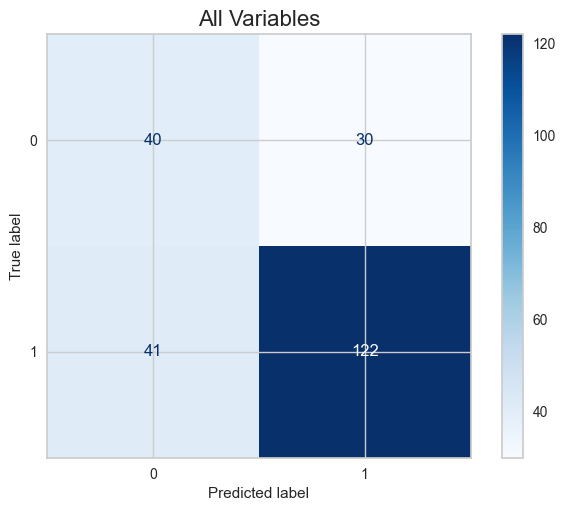

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_estimator.classes_)
disp.plot(cmap=plt.cm.Blues)
# disp.plot()
plt.title('All Variables', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/cm_lr_1_full.png', dpi=300, bbox_inches="tight")
plt.show()

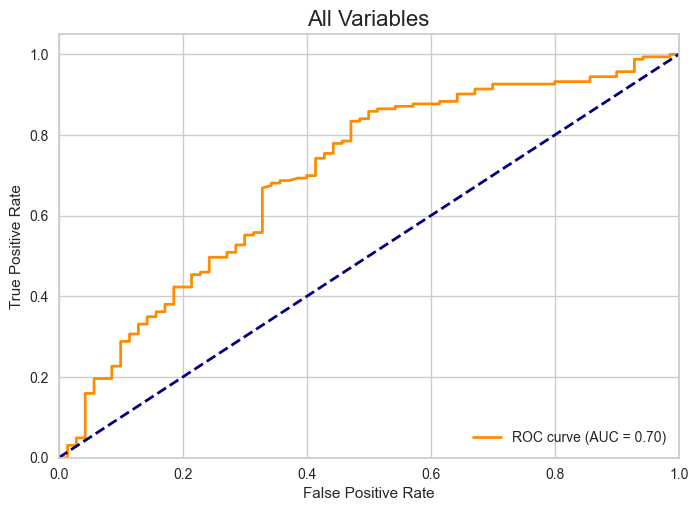

In [23]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Variables', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/roc_lr_1_full.png', dpi=300, bbox_inches="tight")
plt.show()

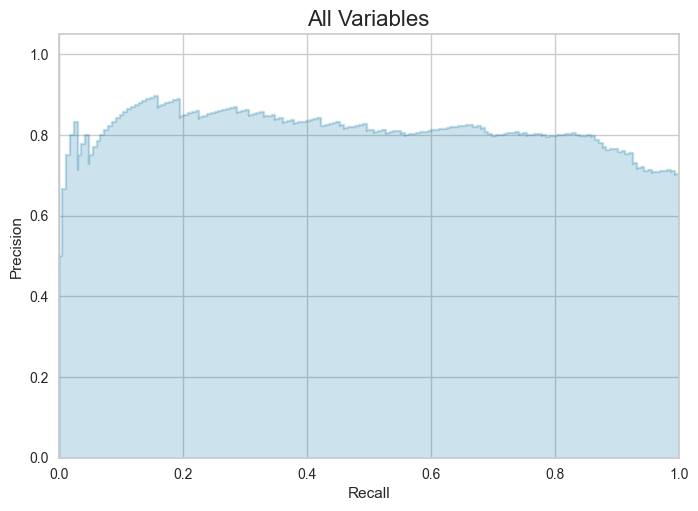

In [24]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('All Variables', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/prc_lr_full_1.png', dpi=300, bbox_inches="tight")
plt.show()

In [25]:
# train_sizes, train_scores, test_scores = learning_curve(best_estimator, X, y)
# display = LearningCurveDisplay(train_sizes=train_sizes,
#                                train_scores=train_scores, test_scores=test_scores, score_name="accuracy")
# display.plot()
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Learning Curve')
# plt.show()

## Reduced Models

### Lasso Regression and Logistic Regression

Lasso Regression is used to build the reduced model, with fewer predictor variables. This model will compared to the full model. 

In [26]:
lasso_logistic = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l1", solver='liblinear'))),
    ('classifier', LogisticRegression(max_iter=100000))
])

In [27]:
param_grid = {
    'classifier__solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'classifier__penalty': ['l1', 'l2']
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8090)

grid_search = GridSearchCV(estimator=lasso_logistic, param_grid=param_grid, cv=kfold, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  16.8s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  11.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  18.6s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   6.3s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  23.3s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  13.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  24.7s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  25.4s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  15.6s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=  32.0s
[CV] END ...classifier__penalty=l1, classifier__solver=lbfgs; total time=   9.1s
[CV] END ...classifier__penalty=l1, cl

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=8090, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LogisticRegressionCV(penalty='l1',
                                                                                       solver='liblinear'))),
                                       ('classifier',
                                        LogisticRegression(max_iter=100000))]),
             param_grid={'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'lbfgs',
                                                'newton-cg', 'saga']},
             verbose=2)

In [28]:
best_estimator = grid_search.best_estimator_

print("Best Estimator:", best_estimator)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegressionCV(penalty='l1',
                                                                solver='liblinear'))),
                ('classifier', LogisticRegression(max_iter=100000))])


In [29]:
ranks = pd.DataFrame(
    {
        'Model': grid_search.cv_results_['params'],
        'Mean Test Score': grid_search.cv_results_['mean_test_score'],
        'Std Test Score': grid_search.cv_results_['std_test_score'],
        'Rank': grid_search.cv_results_['rank_test_score']
    }
)

pd.concat([ranks.drop(['Model'], axis=1), ranks['Model'].apply(pd.Series)], axis=1).sort_values(by="Rank")

,Mean Test Score,Std Test Score,Rank,classifier__penalty,classifier__solver
5,0.708384,0.042601,1,l2,lbfgs
4,0.697441,0.033029,2,l2,liblinear
6,0.695455,0.061966,3,l2,newton-cg
7,0.684512,0.029007,4,l2,saga
3,0.682559,0.028165,5,l1,saga
0,0.662256,0.063498,6,l1,liblinear
1,NaN,NaN,7,l1,lbfgs
2,NaN,NaN,7,l1,newton-cg


In [30]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
cm

Confusion Matrix:


array([[ 37,  33],
       [ 43, 120]])

In [32]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

odds_ratio, p_value = fisher_exact([[TP, FP], [FN, TN]])

log_odds_ratio = np.log(odds_ratio)

std_error_log_odds_ratio = np.sqrt(1/TP + 1/FP + 1/FN + 1/TN)

z_score = 1.96  # 95% confidence interval
lower_bound = log_odds_ratio - z_score * std_error_log_odds_ratio
upper_bound = log_odds_ratio + z_score * std_error_log_odds_ratio


ci_lower = np.exp(lower_bound)
ci_upper = np.exp(upper_bound)

print("95% Confidence Interval for Odds Ratio:", (ci_lower, ci_upper))
print("p-value for Odds Ratio:", p_value)

95% Confidence Interval for Odds Ratio: (1.7441079826709478, 5.613423125757966)
p-value for Odds Ratio: 0.00015027015551408282


In [33]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        70
           1       0.78      0.74      0.76       163

    accuracy                           0.67       233
   macro avg       0.62      0.63      0.63       233
weighted avg       0.69      0.67      0.68       233



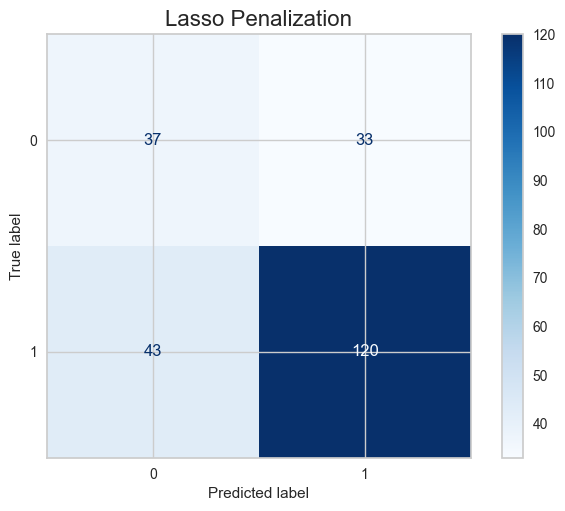

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_estimator.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Lasso Penalization', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/cm_lr_1_red1.png', dpi=300, bbox_inches="tight")
plt.show()

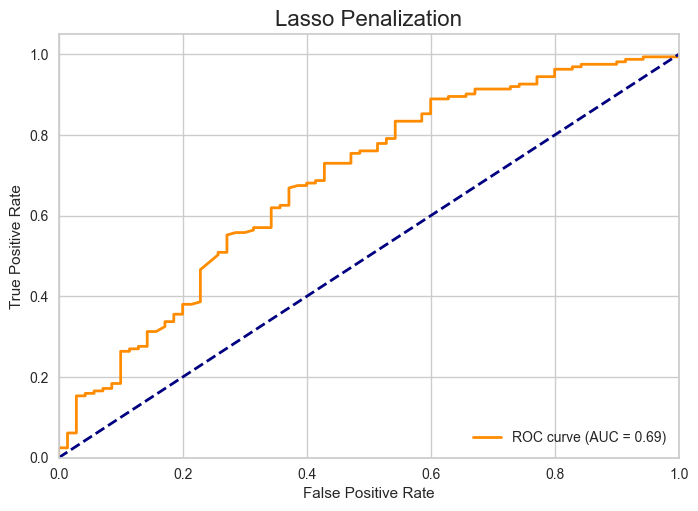

In [35]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lasso Penalization', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/roc_lr_1_red1.png', dpi=300, bbox_inches="tight")
plt.show()

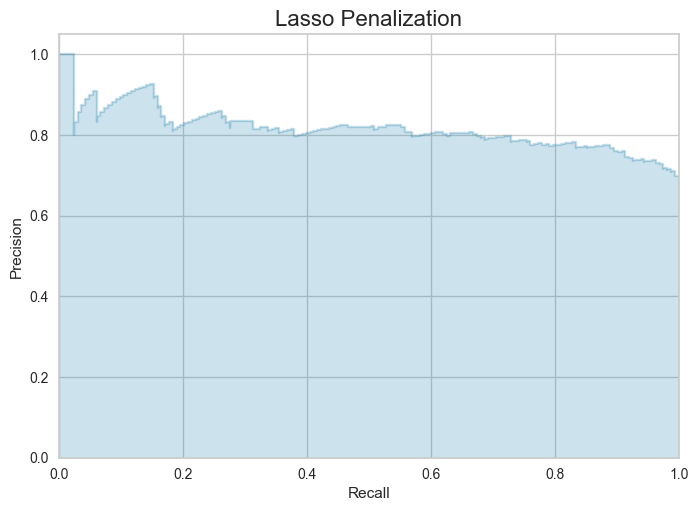

In [36]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Lasso Penalization', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/prc_lr_1_red1.png', dpi=300, bbox_inches="tight")
plt.show()

In [37]:
# train_sizes, train_scores, test_scores = learning_curve(best_estimator, X, y)
# display = LearningCurveDisplay(train_sizes=train_sizes,
#                                train_scores=train_scores, test_scores=test_scores, score_name="accuracy")
# display.plot()
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Learning Curve')
# plt.show()

## Feature Importance Models and Base Line Models

In [56]:
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [57]:
fi = feature_importance[feature_importance['importance'] >= 0.01]
fi = fi.index.tolist()

In [58]:
fi_data = X[fi]

In [59]:
fi_data.head()

,Price_High_Delta,Price_Low_Delta,raise_to_ipo_ratio,Offer_Amount,Price,Years_to_IPO,Shares,market_min0,Venture Capital,90_Trailing_IPO_plus95,...,90_Trailing_IPO_sub95,ipo_same_day,market_min2,Private Equity,cancelled_rounds,MBO_LBO,market_min6,number_of_bookrunners,m2_min5,retail_sales_min2
0,-0.117647,0.000000,0.556105,281250000,15.0,4,18750000,0.017861,3,14,...,30,2,-0.014726,2,0,0,0.025313,4,-0.000605,0.006981
1,-0.166667,-0.062500,0.654545,225000000,15.0,11,15000000,0.010405,1,14,...,30,2,-0.014726,3,0,1,-0.015664,4,-0.000605,0.006981
2,-0.266667,-0.153846,0.337223,100000010,11.0,5,9090910,-0.002889,8,11,...,31,1,-0.014726,2,0,0,0.025313,5,-0.000605,0.006981
3,-0.095238,0.000000,1.000000,190000000,19.0,8,10000000,-0.032010,0,12,...,34,1,-0.006441,5,0,1,0.027951,5,0.004669,0.007609
4,-0.061224,0.045455,2.087695,1483870944,46.0,249,32258064,-0.034603,0,14,...,36,2,-0.006441,0,0,1,0.027951,11,0.004669,0.007609


In [60]:
X_train, X_test, y_train, y_test = train_test_split(fi_data, y, test_size=0.3, random_state=8090)

unique_values = set(X_train['Industry'])

# Check if at least one sample from each unique value is present in the training set
for value in unique_values:
    if value not in X_train['Industry'].unique():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8090)
        break

In [61]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ('classifier', LogisticRegressionCV(max_iter=100000))
])

In [62]:
param_grid = {
    'classifier__solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'classifier__penalty': ['l1', 'l2']
}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8090)

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END ...classifier__penalty=l1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ...classifier__penalty=l1, cl

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=8090, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('classifier',
                                        LogisticRegressionCV(max_iter=100000))]),
             param_grid={'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'lbfgs',
                                                'newton-cg', 'saga']},
             verbose=2)

In [63]:
ranks = pd.DataFrame(
    {
        'Model': grid_search.cv_results_['params'],
        'Mean Test Score': grid_search.cv_results_['mean_test_score'],
        'Std Test Score': grid_search.cv_results_['std_test_score'],
        'Rank': grid_search.cv_results_['rank_test_score']
    }
)

pd.concat([ranks.drop(['Model'], axis=1), ranks['Model'].apply(pd.Series)], axis=1).sort_values(by="Rank")

,Mean Test Score,Std Test Score,Rank,classifier__penalty,classifier__solver
6,0.701111,0.047346,1,l2,newton-cg
4,0.682525,0.045055,2,l2,liblinear
5,0.675286,0.031946,3,l2,lbfgs
0,0.675118,0.048601,4,l1,liblinear
3,0.669562,0.059638,5,l1,saga
7,0.662222,0.057659,6,l2,saga
1,NaN,NaN,7,l1,lbfgs
2,NaN,NaN,7,l1,newton-cg


In [64]:
best_estimator = grid_search.best_estimator_

print("Best Estimator:", best_estimator)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('classifier',
                 LogisticRegressionCV(max_iter=100000, solver='newton-cg'))])


In [65]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [66]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
cm

Confusion Matrix:


array([[ 42,  28],
       [ 43, 120]])

In [67]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

odds_ratio, p_value = fisher_exact([[TP, FP], [FN, TN]])

log_odds_ratio = np.log(odds_ratio)

std_error_log_odds_ratio = np.sqrt(1/TP + 1/FP + 1/FN + 1/TN)

z_score = 1.96  # 95% confidence interval
lower_bound = log_odds_ratio - z_score * std_error_log_odds_ratio
upper_bound = log_odds_ratio + z_score * std_error_log_odds_ratio


ci_lower = np.exp(lower_bound)
ci_upper = np.exp(upper_bound)

print("95% Confidence Interval for Odds Ratio:", (ci_lower, ci_upper))
print("p-value for Odds Ratio:", p_value)

95% Confidence Interval for Odds Ratio: (2.31667332991547, 7.563856833518928)
p-value for Odds Ratio: 1.6216833980466463e-06


In [68]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54        70
           1       0.81      0.74      0.77       163

    accuracy                           0.70       233
   macro avg       0.65      0.67      0.66       233
weighted avg       0.72      0.70      0.70       233



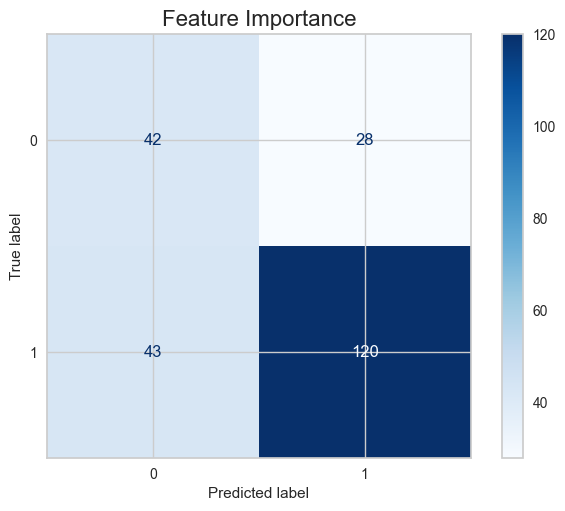

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_estimator.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Feature Importance', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/cm_lr_1_fi.png', dpi=300, bbox_inches="tight")
plt.show()

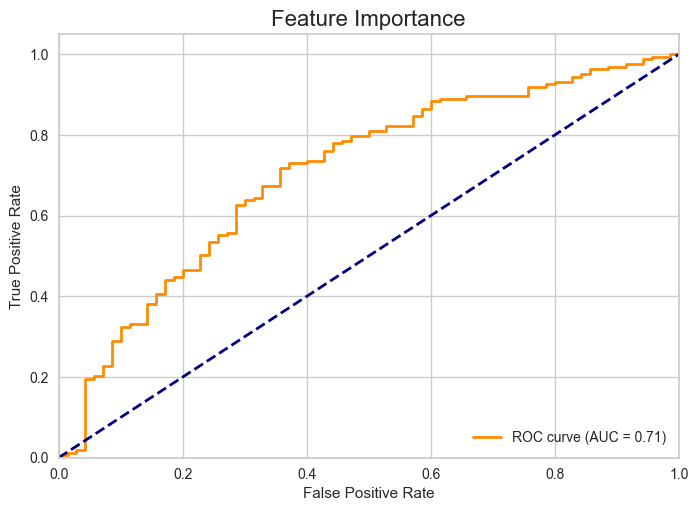

In [70]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feature Importance', fontsize=16)
plt.legend(loc="lower right")
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/roc_lr_1_fi.png', dpi=300, bbox_inches="tight")
plt.show()

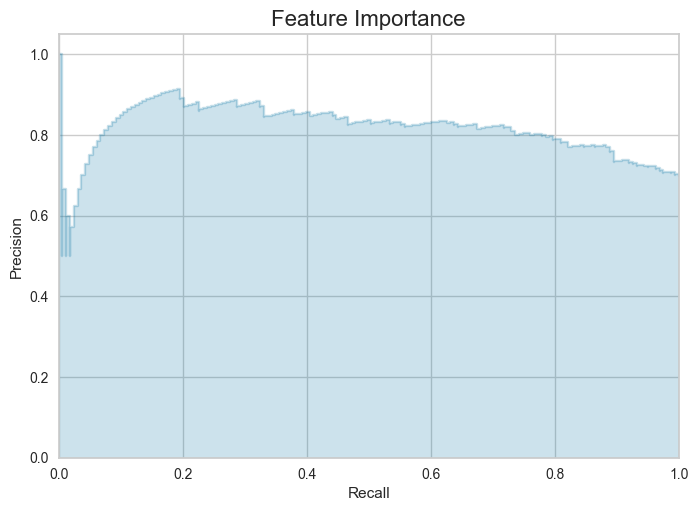

In [71]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Feature Importance', fontsize=16)
plt.savefig('/Users/michael/Documents/MA Stats/STAT 8090/prc_lr_1_fi.png', dpi=300, bbox_inches="tight")
plt.show()

---
### End of Notebook